<a href="https://colab.research.google.com/github/choeuneheol/python-practice/blob/master/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%ACDAY7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
#3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))
model.summary()

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개 출력
model.add(Dense(8, activation='relu'))

#이어서 3개 출력
model.add(Dense(3, activation='softmax'))

model.summary()

#손실함수(Loss function)
# #MSE(Mean Squared Error, MSE)
# model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

#Binary Cross-Entropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# ----------------------------------------------------------------------------------

#Batch Size에 따른 경사 하강법
# Batch Gradient Descent
model.fit(x_train, y_train, batch_size=len(x_train))

#확률적 경사하강법()(Stochastic Gradient Descent, SGD)
model.fit(x_train, y_train, batch_size=1)

# 미니 배치 경사 하강법(Mini-Batch Gradient Descent)
model.fit(x_train, y_train, batch_size=128) #2의 n제곱

batch_size #지정하지 않을 때 기본값 32

# 옵티마이저
Momentum
tf.keras.optimizers.SGD(Ir=0.01, momentum=0.9)

# Adagrad
tf.keras.optimizers.Adagrad(Ir=0.01, epsilon=1e-6)

# RMSprop
tf.keras.optimizers.RMSprop(Ir=0.001, rho=0.9, epsilon=1e-06)

# Adam
tf.keras.optimizers.Adam(Ir=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # 'sgd', 'rmsprop'

In [20]:
from tensorflow.keras.layers import Dropout, Dense

max_words =10000

num_classes= 46

model = Sequential()

model.add(Dense(256, input_shape=(max_words,), activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Gradient Vanishing
model.add(Dense(8, input_dim=4, activation='relu'))

# Gradient Exploding
Gradient Clipping for RNN
from tensorflow.keras import optimizers
Adam = optimizers.Adam(Ir=0.0001, clipnorm=1.)

# Weight initialization
# Xavier Initialization (Glorot Initialization)
# He initialization
# Sigmoid, TanH + Xavier
# ReLU + He

#Batch Normalization
#next page

# Batch Normalization
# Internal Covariate Shift
# 배치 단위 정규화
# Training & Test
# 장점
# BN + Sigmoid or TahH(Okay!)
#Less sensitive weight initialization
#Faster training speed
#Not for service
#단점
#Batch size
# Not for RNN

# Layer Normalization
# Batch VS Layer Normalization
# model.add(BatchNormalizetion)
# model.add(LayerNormalizetion)

Keras 절차

전처리 -> 워드임베딩 -> 모델링 -> 컴파일 -> 학습 -> 평가 -> 예측 -> 저장



# 전처리

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
train_text = """The earth is an awesome place live"""

#단어 집합 생성
tokenizer.fit_on_texts([train_text])

#레이블 인코딩
sub_text = """The earth is an great place live"""
sequences = tokenizer.texts_to_sequences([sub_text])[0]
print("레이블 인토딩:",sequences)
print("단어 집합:", tokenizer.word_index)

pad_sequences([[1,2,3],[3,4,5,6],[7,8]],maxlen=3, padding='pre')

# 워드임베딩
# 원핫인코딩 : [01000...0000000]
# 워드임베딩 : [01.-1.2 0.8 0.2 1.8]

# 토큰화
# tokenized_text = [['Hepe','to','see','you','soon'],['Nice','to','see','you','again']]

# 각 단어에 대한 레이블 인코딩
# encoded_text =[[7,1,2,3,4],[5,1,2,3,6]]

# 위 레이블 인코딩 데이터가 아래의 임베딩 층의 입력이 된다
# vocab_size = 7
# embedding_dim=2

모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Emdedding(vocab_size,output_dim, input_length))
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1,))

컴파일
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential
vocab_size = 10000
embedding_dim = 32
hidden_units = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN)

회귀문제 - mean_squared_error
다중 클래스 분류 - categorical_crossentropy

학습
compile() 코드 다음
model.fit(x_train, y_train, epochs=10, batch_size=32)
파라미터 추가
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0, validaation_data(x_val, y_val))
훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

평가/예측/저장
학습다음
model.evaluate(x_test, y_test, batch_size=32)

model.predict(x_input, batch_size=32)

model.save("model_name.h5")

from tensorflow.keras.models import load_model
model = load_model("model_name.h5")

Functional API
Sequential API
from tensorflow.keras

from tensorflow.keras.layers import input, Dense
from tensorflow.models import Model
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, avtivation='sigmoid')(hidden2)
model=model(inputs=inputs, outputs=output)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])



In [ ]:
# 선형회귀 구현 Sequential VS Functional

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optiminzers

x=[1,2,3,4,5,6,7,8,9]
y=[11,22,33,44,53,66,77,87,95]

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd=optimizers.SGD(Ir=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x,y epochs=300)

# Functional API

from tensorflow.keras.layers import Input, Dense, concatenate

from tensorflow.keras.models import Model

inputA = Input(shape=(2,))

inputB = Input(shape=(4,))

x = Dense(4, activation="relu")(inputA)

x = Dense(2, activation="relu")(x)

x = Model(inputs=inputA, Outputs=x)

y = Dense(4, activation ="relu")(inputB)

y = Dense(2, activation ="relu")(y)

y = Dense(2, activation ="relu")(y)

y = Model(inputs=inputB, output=y)

result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)

z = Dense(1, activation="linear")(z)

In [ ]:
# Functional API

from tensorflow.keras.layers import Input, Dense, concatenate

from tensorflow.keras.models import Model

inputA = Input(shape=(2,))

inputB = Input(shape=(4,))

x = Dense(4, activation="relu")(inputA)

x = Dense(2, activation="relu")(x)

x = Model(inputs=inputA, Outputs=x)

y = Dense(4, activation ="relu")(inputB)

y = Dense(2, activation ="relu")(y)

y = Dense(2, activation ="relu")(y)

y = Model(inputs=inputB, output=y)

result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)

z = Dense(1, activation="linear")(z)

In [30]:
from tensorflow.keras.layers import Input, Dense, LSTM

from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))

lstm_layer = LSTM(10)(inputs)

x = Dense(10, activation = 'relu')(lstm_layer)

output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs = output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Subclassing API

#회귀 분석 subclassing api 구성해보기

import tensorflow as tf

class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self,x):
    y_pred = self.linear_layer(x)

    return y_pred
model = LinearRegression()

sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [49]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
texts=['먹고 싶은 사과','먹고 싶은 바나나','길고 노란 바나나 바나나','저는 과일이 좋아요']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)
print(tokenizer.texts_to_matrix(texts, mode ='count'))
print(tokenizer.texts_to_matrix(texts, mode ='binary'))
print(tokenizer.texts_to_matrix(texts, mode ='tfidf').round(2))
print(tokenizer.texts_to_matrix(texts, mode ='freq').round(2))

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}
[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]
[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]
[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]
[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


In [51]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
newsdata = fetch_20newsgroups(subset='train')
print(newsdata.keys())
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))
print('총 주제의 개수 :{}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
훈련용 샘플의 개수 : 11314
총 주제의 개수 :20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [52]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [53]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [55]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [56]:
data.isnull().values.any()

False

In [57]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


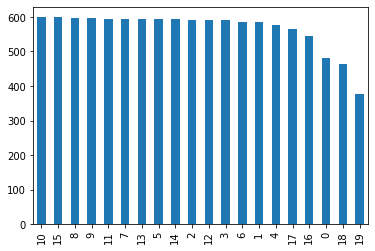

In [58]:
data['target'].value_counts().plot(kind='bar')

In [59]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [62]:
newsdata_test = fetch_20newsgroups(subset='test',shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target
vocab_size = 10000
num_classes = 20

In [63]:
def prepare_data(train_data, test_data, mode):
  tokenizer = Tokenizer(num_words = vocab_size)
  tokenizer.fit_on_texts(train_data)
  x_train = tokenizer.texts_to_matrix(train_data, mode=mode)
  x_test = tokenizer.texts_to_matrix(test_data, mode=mode)
  return x_train, x_test, tokenizer.index_word

In [66]:
x_train, x_test, index_to_word = prepare_data(train_email, test_email, 'binary')
y_train = to_categorical(train_label, num_classes)
y_test = to_categorical(test_label, num_classes)
print(len(x_train[0]))
print(x_train[0])
for i in range(20):
  print(sum(x_train[i]))
print(len(y_train[0]))
print(y_train[0])
print(sum(y_train[0]))

10000
[0. 1. 1. ... 0. 0. 0.]
86.0
93.0
192.0
92.0
115.0
197.0
64.0
214.0
42.0
145.0
90.0
271.0
31.0
336.0
146.0
131.0
189.0
564.0
88.0
108.0
20
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0


In [67]:
print('훈련 샘플 본문의 크기 : {}'.format(x_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(x_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [76]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 :{}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 :mic


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [81]:
model = Sequential()
model.add(Dense(256, input_shape = (vocab_size,),activation='relu'))

In [83]:
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
# return.score[1]

Epoch 1/5
80/80 [==============================] - 4s 45ms/step - loss: 2.6468 - accuracy: 0.3381 - val_loss: 2.1722 - val_accuracy: 0.8984
Epoch 2/5
80/80 [==============================] - 3s 43ms/step - loss: 1.9751 - accuracy: 0.5030 - val_loss: 1.3047 - val_accuracy: 0.9055
Epoch 3/5
80/80 [==============================] - 3s 43ms/step - loss: 1.6988 - accuracy: 0.5049 - val_loss: 0.9190 - val_accuracy: 0.9134
Epoch 4/5
80/80 [==============================] - 3s 43ms/step - loss: 1.6506 - accuracy: 0.5060 - val_loss: 0.7612 - val_accuracy: 0.9037
Epoch 5/5
80/80 [==============================] - 3s 43ms/step - loss: 1.5900 - accuracy: 0.5165 - val_loss: 0.6667 - val_accuracy: 0.9170


In [ ]:
modes=['binary','count','tfidf','freq']
for mode in modes:
  x_train, x_test, _=prepare_data(train_email, test_email, mode)
  score = fit_and_evaluate(x_train, y_train, x_test, y_test)
  print(mode+'모드의 테스트 정확도:',score)